In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prince
import matplotlib

from sklearn.preprocessing import  OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier

train = pd.read_csv('./train.csv').drop(columns=['ID'])
test = pd.read_csv('./test.csv').drop(columns=['ID'])

# 한글 폰트 설정 (맑은 고딕)
matplotlib.rc('font', family='Malgun Gothic')  # 윈도우 사용 시

In [11]:
# '총 생성 배아 수' 값 개수 계산
value_counts = train['총 생성 배아 수'].value_counts().sort_index()
print(train['총 생성 배아 수'].value_counts().sort_index())

총 생성 배아 수
0.0     53349
1.0     15223
2.0     19190
3.0     20952
4.0     21612
5.0     20410
6.0     18623
7.0     16029
8.0     13620
9.0     11131
10.0     9065
11.0     7090
12.0     5720
13.0     4321
14.0     3360
15.0     2516
16.0     1916
17.0     1504
18.0     1117
19.0      799
20.0      640
21.0      461
22.0      354
23.0      266
24.0      195
25.0      163
26.0      105
27.0       84
28.0       51
29.0       46
30.0       40
31.0       25
32.0       23
33.0       12
34.0       15
35.0        4
36.0        7
37.0        7
38.0        3
40.0        1
41.0        2
42.0        3
43.0        1
44.0        3
51.0        2
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_10348\3519421205.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


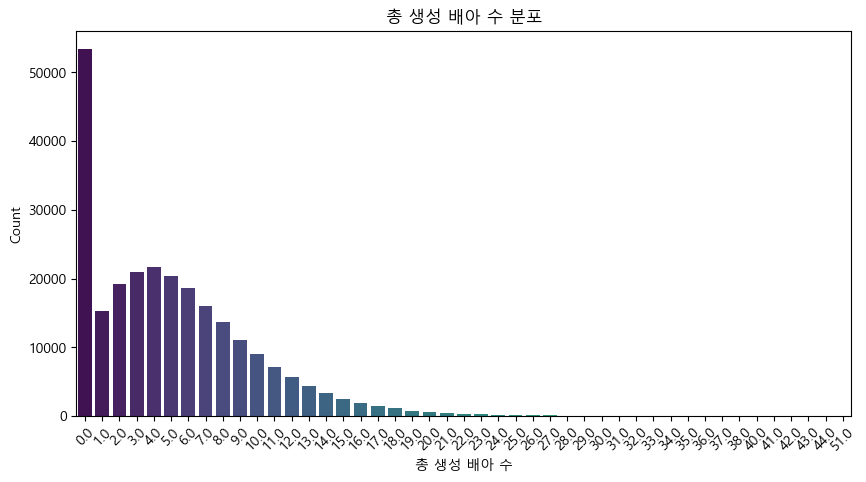

In [17]:
# 막대 그래프 그리기
plt.figure(figsize=(10, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# 그래프 제목 및 라벨 설정
plt.title('총 생성 배아 수 분포')
plt.xlabel('총 생성 배아 수')
plt.ylabel('Count')

# x축 눈금 조정 (필요하면)
plt.xticks(rotation=45)

plt.show()

전반적으로 총 생성 배아 수는 0이 가장 많고, 갈수록 떨어지는 양상을 보임

In [19]:
import pandas as pd

# 특정 feature 선택
feature_name = '총 생성 배아 수'  # 예시

# 각 feature 값에 따른 임신 성공 확률 계산
success_rate = train.groupby(feature_name)['임신 성공 여부'].mean()

# 결과 출력
print(success_rate)

총 생성 배아 수
0.0     0.171868
1.0     0.094856
2.0     0.180094
3.0     0.241886
4.0     0.277300
5.0     0.305439
6.0     0.322988
7.0     0.338324
8.0     0.350000
9.0     0.354326
10.0    0.360397
11.0    0.366855
12.0    0.352448
13.0    0.366119
14.0    0.355952
15.0    0.357711
16.0    0.347077
17.0    0.322473
18.0    0.303491
19.0    0.307885
20.0    0.285938
21.0    0.264642
22.0    0.251412
23.0    0.210526
24.0    0.200000
25.0    0.202454
26.0    0.209524
27.0    0.238095
28.0    0.156863
29.0    0.217391
30.0    0.175000
31.0    0.120000
32.0    0.260870
33.0    0.166667
34.0    0.333333
35.0    0.000000
36.0    0.142857
37.0    0.142857
38.0    0.000000
40.0    0.000000
41.0    0.000000
42.0    0.000000
43.0    0.000000
44.0    0.000000
51.0    0.000000
Name: 임신 성공 여부, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_10348\422931253.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rate.index, y=success_rate.values, palette='coolwarm')


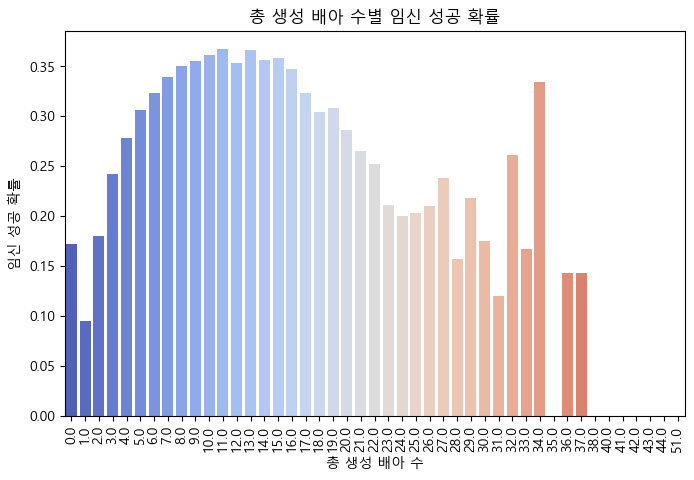

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 막대 그래프 그리기
plt.figure(figsize=(8, 5))
sns.barplot(x=success_rate.index, y=success_rate.values, palette='coolwarm')

# 그래프 설정
plt.title(f'{feature_name} 별 임신 성공 확률')
plt.xlabel(feature_name)
plt.ylabel('임신 성공 확률')

# x축 눈금 조정 (필요하면)
plt.xticks(rotation=90)

plt.show()

총 생성 배아 수는 10대에서 임신 성공 확률이 높고,
커질수록 떨어지며, 34에서 성공 확률이 튀고, 이후로 40에선 전무함

-> 아마 임신이 잘 안될수록 배아를 많이 생성하려는 경향이 있다?

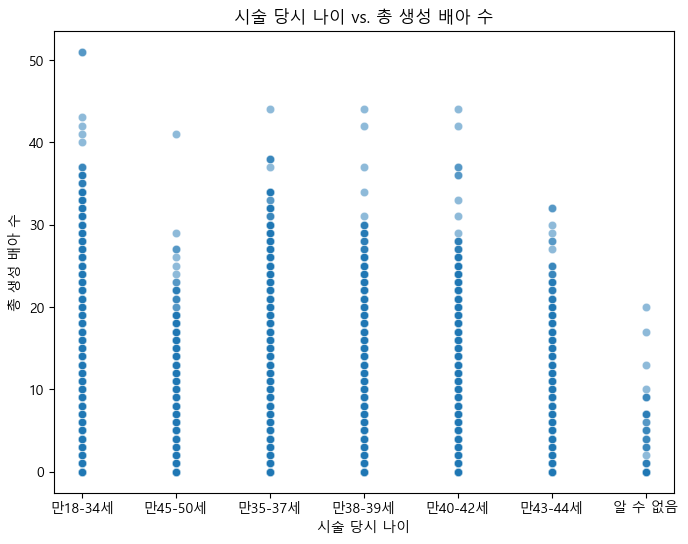

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train['시술 당시 나이'], y=train['총 생성 배아 수'], alpha=0.5)

# 그래프 설정
plt.title('시술 당시 나이 vs. 총 생성 배아 수')
plt.xlabel('시술 당시 나이')
plt.ylabel('총 생성 배아 수')

plt.show()

나이랑 비교했을 때는 나이가 적을 때 배아 수를 많이 생성하긴 하는데.. 큰 차이는 없어 보이고
잠시만

In [30]:
# 시술 당시 나이별 총 생성 배아 수의 평균 계산
average_embryos_by_age = train.groupby('시술 당시 나이')['총 생성 배아 수'].mean()

# 결과 출력
print(average_embryos_by_age)

시술 당시 나이
만18-34세    6.093571
만35-37세    5.029150
만38-39세    4.404907
만40-42세    3.890477
만43-44세    3.344178
만45-50세    3.187650
알 수 없음     0.513678
Name: 총 생성 배아 수, dtype: float64


와 이게 0이 많으니까 평균이 개 떨어지네..
왜 0이 많은지는 좀 분석해야 할 듯

배아 생성 주요 이유와도 연계해서 분석?

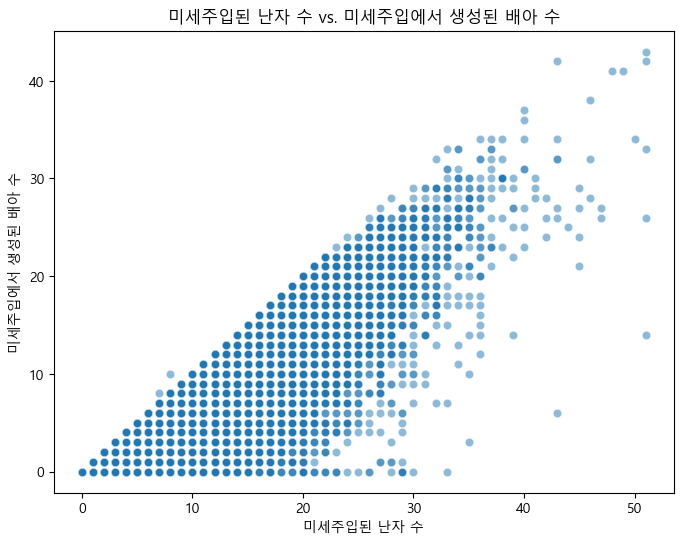

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train['미세주입된 난자 수'], y=train['미세주입에서 생성된 배아 수'], alpha=0.5)

# 그래프 설정
plt.title('미세주입된 난자 수 vs. 미세주입에서 생성된 배아 수')
plt.xlabel('미세주입된 난자 수')
plt.ylabel('미세주입에서 생성된 배아 수')

plt.show()

약간은 linear해 보인다.. 뭔가 분석할만한 여지가 있지 않을까?
혹은 차원축소?

In [38]:
import pandas as pd

# 특정 feature 선택
feature_name = '미세주입된 난자 수'  # 예시

# 각 feature 값에 따른 임신 성공 확률 계산
success_rate = train.groupby(feature_name)['임신 성공 여부'].mean()

# 결과 출력
print(success_rate)

미세주입된 난자 수
0.0     0.250742
1.0     0.057307
2.0     0.111217
3.0     0.166582
4.0     0.210247
5.0     0.255391
6.0     0.276749
7.0     0.295169
8.0     0.306320
9.0     0.318266
10.0    0.334538
11.0    0.349571
12.0    0.339381
13.0    0.357988
14.0    0.338626
15.0    0.349107
16.0    0.342712
17.0    0.341141
18.0    0.319950
19.0    0.334150
20.0    0.326981
21.0    0.282663
22.0    0.269817
23.0    0.288344
24.0    0.236915
25.0    0.220641
26.0    0.224066
27.0    0.167568
28.0    0.169697
29.0    0.230088
30.0    0.173913
31.0    0.133333
32.0    0.192308
33.0    0.179487
34.0    0.142857
35.0    0.129032
36.0    0.074074
37.0    0.214286
38.0    0.090909
39.0    0.142857
40.0    0.125000
41.0    0.000000
42.0    0.333333
43.0    0.142857
44.0    0.000000
45.0    0.000000
46.0    0.000000
47.0    0.000000
48.0    0.000000
49.0    0.000000
50.0    0.000000
51.0    0.000000
Name: 임신 성공 여부, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_10348\3993263209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rate.index, y=success_rate.values, palette='coolwarm')


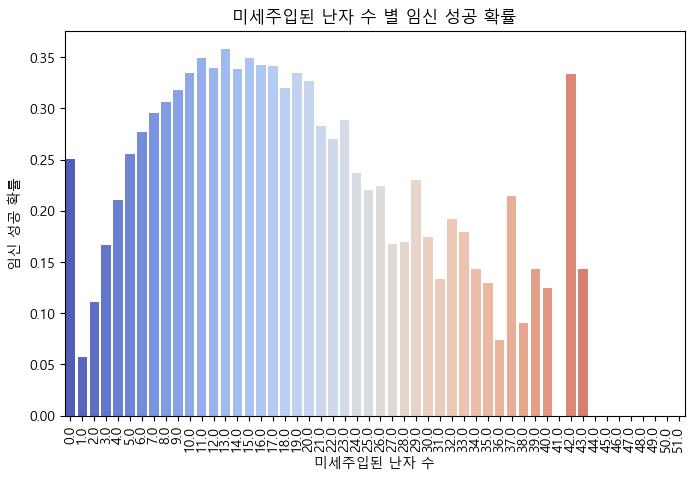

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 막대 그래프 그리기
plt.figure(figsize=(8, 5))
sns.barplot(x=success_rate.index, y=success_rate.values, palette='coolwarm')

# 그래프 설정
plt.title(f'{feature_name} 별 임신 성공 확률')
plt.xlabel(feature_name)
plt.ylabel('임신 성공 확률')

# x축 눈금 조정 (필요하면)
plt.xticks(rotation=90)

plt.show()

In [42]:
import pandas as pd

# 특정 feature 선택
feature_name = '미세주입에서 생성된 배아 수'  # 예시

# 각 feature 값에 따른 임신 성공 확률 계산
success_rate = train.groupby(feature_name)['임신 성공 여부'].mean()

# 결과 출력
print(success_rate)

미세주입에서 생성된 배아 수
0.0     0.243102
1.0     0.091459
2.0     0.182092
3.0     0.241779
4.0     0.280271
5.0     0.310454
6.0     0.328126
7.0     0.340584
8.0     0.348825
9.0     0.358335
10.0    0.364183
11.0    0.375769
12.0    0.337135
13.0    0.357973
14.0    0.353464
15.0    0.346026
16.0    0.305430
17.0    0.338129
18.0    0.306163
19.0    0.297994
20.0    0.288390
21.0    0.254902
22.0    0.262069
23.0    0.211864
24.0    0.153846
25.0    0.191176
26.0    0.205128
27.0    0.228571
28.0    0.200000
29.0    0.238095
30.0    0.125000
31.0    0.166667
32.0    0.250000
33.0    0.000000
34.0    0.500000
36.0    0.000000
37.0    0.000000
38.0    0.000000
41.0    0.000000
42.0    0.000000
43.0    0.000000
Name: 임신 성공 여부, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_10348\3993263209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rate.index, y=success_rate.values, palette='coolwarm')


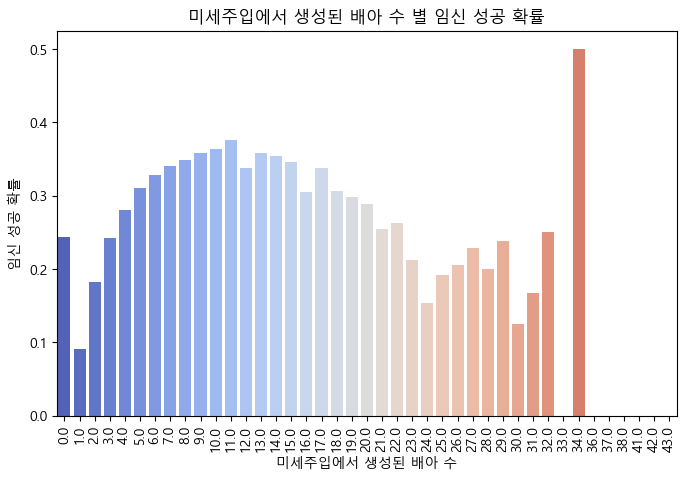

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 막대 그래프 그리기
plt.figure(figsize=(8, 5))
sns.barplot(x=success_rate.index, y=success_rate.values, palette='coolwarm')

# 그래프 설정
plt.title(f'{feature_name} 별 임신 성공 확률')
plt.xlabel(feature_name)
plt.ylabel('임신 성공 확률')

# x축 눈금 조정 (필요하면)
plt.xticks(rotation=90)

plt.show()

미세주입 난자 수에서 일부 값이 줄어들어 미세주입에서 생성된 배아 수가 이루어지는 것 같다
그리고 미세주입에서 생성된 배아 수 = 미세주입 배아 이식 수 + 미세주입 저장 배아 수
의 공식이 반드시 성립하진 않는다. (왜냐하면 생성된 모든 배아가 이식/저장 되지 않기 때문이다)
다만 저장 배아 수가 별로 중요해 보이진 않는다.

In [55]:
import pandas as pd

# 특정 feature 선택
feature_name = '미세주입 배아 이식 수'  # 예시

# 각 feature 값에 따른 임신 성공 확률 계산
success_rate = train.groupby(feature_name)['임신 성공 여부'].mean()

# 결과 출력
print(success_rate)

미세주입 배아 이식 수
0.0    0.223868
1.0    0.319441
2.0    0.312323
3.0    0.168357
Name: 임신 성공 여부, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_10348\3993263209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rate.index, y=success_rate.values, palette='coolwarm')


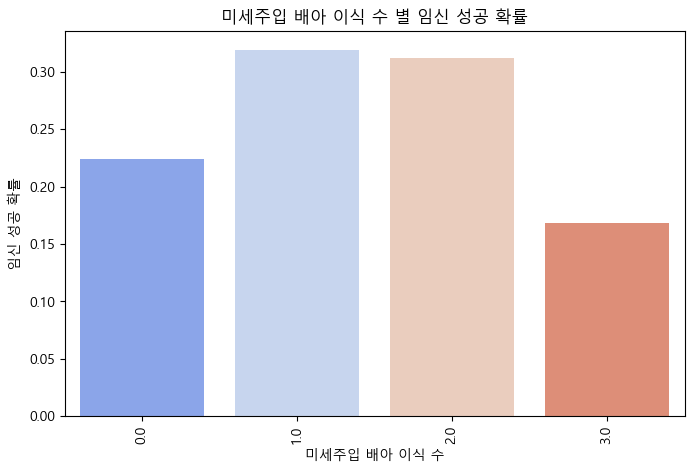

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 막대 그래프 그리기
plt.figure(figsize=(8, 5))
sns.barplot(x=success_rate.index, y=success_rate.values, palette='coolwarm')

# 그래프 설정
plt.title(f'{feature_name} 별 임신 성공 확률')
plt.xlabel(feature_name)
plt.ylabel('임신 성공 확률')

# x축 눈금 조정 (필요하면)
plt.xticks(rotation=90)

plt.show()

In [49]:
# '총 생성 배아 수' 값 개수 계산
value_counts = train['미세주입 배아 이식 수'].value_counts().sort_index()
print(train['미세주입 배아 이식 수'].value_counts().sort_index())

미세주입 배아 이식 수
0.0    138774
1.0     46475
2.0     59685
3.0      5126
Name: count, dtype: int64


In [51]:
import pandas as pd

# 특정 feature 선택
feature_name = '미세주입 후 저장된 배아 수'  # 예시

# 각 feature 값에 따른 임신 성공 확률 계산
success_rate = train.groupby(feature_name)['임신 성공 여부'].mean()

# 결과 출력
print(success_rate)

미세주입 후 저장된 배아 수
0.0     0.244099
1.0     0.346487
2.0     0.375209
3.0     0.366353
4.0     0.354269
5.0     0.343812
6.0     0.326625
7.0     0.258014
8.0     0.258581
9.0     0.231767
10.0    0.169165
11.0    0.148276
12.0    0.146718
13.0    0.075000
14.0    0.028571
15.0    0.031250
16.0    0.048077
17.0    0.025000
18.0    0.024691
19.0    0.019231
20.0    0.000000
21.0    0.000000
22.0    0.000000
23.0    0.031250
24.0    0.000000
25.0    0.000000
26.0    0.000000
27.0    0.000000
28.0    0.000000
29.0    0.000000
30.0    0.000000
32.0    0.000000
34.0    0.000000
38.0    0.000000
41.0    0.000000
42.0    0.000000
43.0    0.000000
51.0    0.000000
Name: 임신 성공 여부, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_10348\3993263209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rate.index, y=success_rate.values, palette='coolwarm')


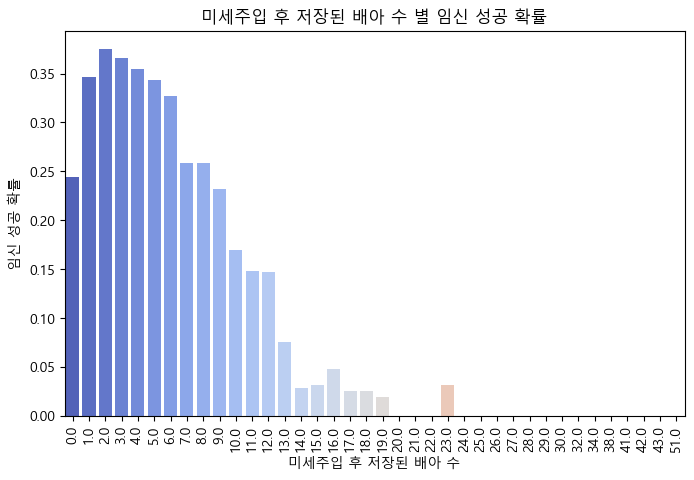

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# 막대 그래프 그리기
plt.figure(figsize=(8, 5))
sns.barplot(x=success_rate.index, y=success_rate.values, palette='coolwarm')

# 그래프 설정
plt.title(f'{feature_name} 별 임신 성공 확률')
plt.xlabel(feature_name)
plt.ylabel('임신 성공 확률')

# x축 눈금 조정 (필요하면)
plt.xticks(rotation=90)

plt.show()